Video Link:
https://drive.google.com/file/d/1Jvb7tPj7AKxdl5397uYnQxHu9z9t1VTn/view?usp=sharing

# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [ ]:
housing = load_boston() # Loading the housing data
housing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### 1.1) Exploratory Data Analysis

In [ ]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
data_y = data.copy()
data_y[13] = target
col_names = list(housing["feature_names"])
col_names.append("target")
data_y.columns = col_names
data_y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
data_analysis = [[max(data_y[i]) for i in data_y.columns]]
data_analysis.append([min(data_y[i]) for i in data_y.columns])
data_analysis.append([sum(data_y[i])/len(data_y[i]) for i in data_y.columns])

In [ ]:
data_analysis = pd.DataFrame(data_analysis)
data_analysis.columns = data_y.columns
data_analysis.index = ['max', 'min', 'average']
data_analysis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
max,88.976200,100.000000,27.740000,1.00000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
min,0.006320,0.000000,0.460000,0.00000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
average,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806


In [ ]:
data_y.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


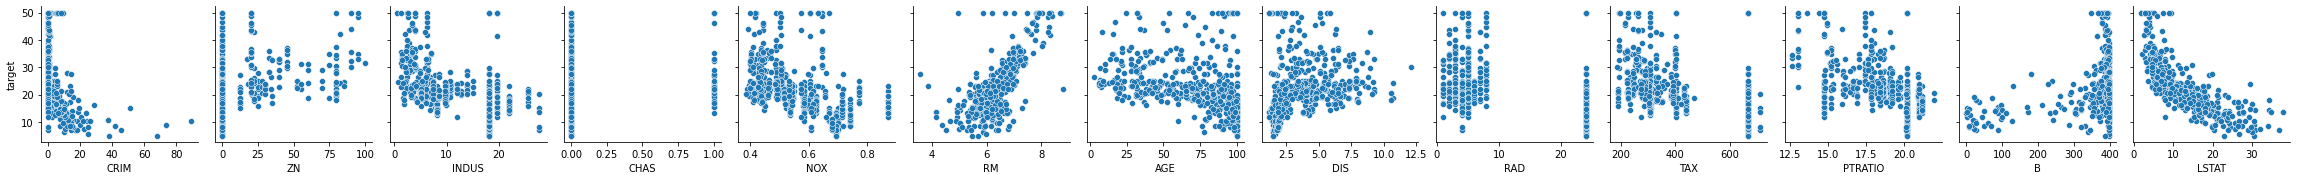

In [ ]:
multiPlot = sns.pairplot(data = data_y, x_vars=data_y.columns[:-1], y_vars=data_y.columns[-1])
plt.show()

In [ ]:
mask = np.ones((14, 14))
mask[-1] = 0
mask[:, -1] = 0
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

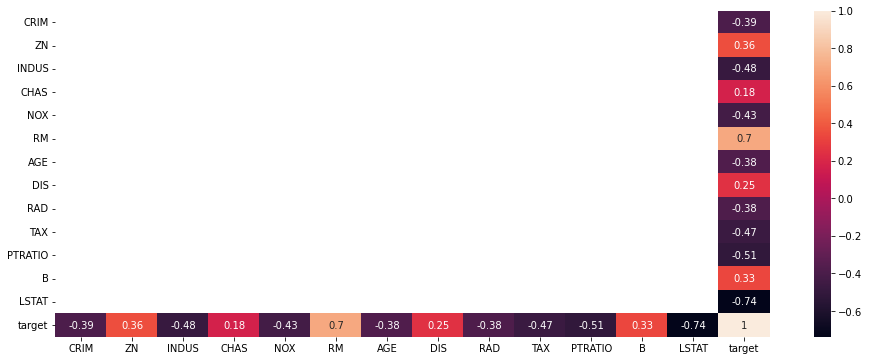

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data_y.corr(), annot=True, mask = mask)
plt.show()

### 1.2) Standardization and splitting

In [ ]:
print(housing['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Standardize and Splitting Dataset
def find_mean_std(df, attr):
    """
    This function taken in a dataframe and an attribute name as arguments
    Returns a tuple of mean and standard deviation of the attribute
    """
    mean_attr = 0
    for attr_val in df[attr]:
        mean_attr = mean_attr + attr_val
    mean_attr = mean_attr/len(df[attr])
    
    std_attr  = 0
    for attr_val in df[attr]:
        std_attr = std_attr + (attr_val - mean_attr)**2
    std_attr = std_attr/len(df[attr])
    
    std_attr = sqrt(std_attr)
    return mean_attr, std_attr
def standardize_df(df, attr):
    """
    This function taken in a dataframe and a list of attribute names as arguments
    Returns the standardized dataframe
    """
    df_new = df.copy()
    for v in attr:
        a_mean, a_std = find_mean_std(df_new, v)
        for i,entry in enumerate(df_new[v]):
            df_new.loc[i, v] = (entry - a_mean)/a_std
    return df_new

In [ ]:
data_y.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [ ]:
for col in data_y.columns:
  print(col, data_y[col].nunique())

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
target 229


In [ ]:
# I observe CHAS and RAD are categorical features, so I won't standardize them

In [ ]:
data_std = data_y.copy()
data_std = standardize_df(data_std, [col for col in data_std.columns if col!="CHAS" and col!="RAD"])
data_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,1.0,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,2.0,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,2.0,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,3.0,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,3.0,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [ ]:
data_std.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,0.069170,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,9.549407,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,-3.020860e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,0.253994,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,8.707259,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,0.000000,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,1.000000,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,0.000000,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,4.000000,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,0.000000,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,5.000000,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,0.000000,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,24.000000,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,1.000000,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,24.000000,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [ ]:
X = data_std.iloc[:,:-1].values
Y = data_std.iloc[:, -1].values

In [ ]:
def train_test(X, Y, seed = 0):
    x = X.copy()
    y = Y.copy()
    np.random.seed(seed)
    indices = np.arange(0, x.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[ : (4 * x.shape[0])//5]
    test_indices = indices[(4 * x.shape[0])//5 : ]
    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = train_test(X, Y)

In [ ]:
len(x_train)/len(X) * 100, len(x_test)/len(X) * 100

(79.84189723320159, 20.158102766798418)

### 1.3) MLP Implementation
- One hidden layer having bias
- One output unit as it is a regression problem
- for act_hidden = 1, activation = sigmoid
- for act_hidden = 2, activation = tanh
### 1.4) Backpropagation Implementation
- Supports gradient flow for both sigmoid and tanh activation in hidden layer
### 1.5) Training the model by justifying hyperparameter choice

In [ ]:
class mlp:
  def __init__(self, X, Y, input_hidden_weights = np.zeros(((13 + 1), 15)), hidden_output_weights = np.zeros(16)
               , act_hidden = 1, act_output = 0, batch_size = 16, epochs = 100, eta = 0.001):
    np.random.seed(0)
    self.X = X
    self.Y = np.reshape(Y, (-1, 1))
    self.input_hidden_weights = np.random.uniform(low = 0.0001, high = 0.01, size = (14, 15))
    self.hidden_output_weights = np.random.uniform(low = 0.0001, high = 0.01, size = (16,1))
    self.act_hidden = act_hidden
    self.act_output = act_output
    self.batch_size = batch_size
    self.epochs = epochs
    self.eta = eta
    
  def sigmoid(self, x):
    return 1/(1 + np.exp(-1 * x))
  def tanh(self, x):
    return (1 - 2/(np.exp(2*x) + 1)) #after simplification

  def feed_forward_backpropagate(self, batch_x, batch_y):    
    
    # adding bias to input layer
    batch_x_biased = np.c_[batch_x, np.ones(len(batch_x))]
    
    # FEED FORWARD            
    # finding hidden node values by multiplying inputs with weight vectors of each node 
    # and they are summed automatically in matrix multiplication
    batch_hidden_nodes = batch_x_biased @ self.input_hidden_weights
    
    # activating the hidden node values
    if self.act_hidden == 1: #sigmoid activation for hidden layer
      batch_hidden_nodes = self.sigmoid(batch_hidden_nodes)      
    elif self.act_hidden == 2: #tanh activation for hidden layer
      batch_hidden_nodes = self.tanh(batch_hidden_nodes)
    else:
      batch_hidden_nodes = batch_hidden_nodes
      
    # adding bias term to hidden layer outputs
    batch_hidden_nodes_biased = np.c_[batch_hidden_nodes, np.ones(len(batch_hidden_nodes))]
    
    # finding output node values by multiplying activated hidden node values with
    # weight vectors from hidden to output layer    
    batch_output_node = batch_hidden_nodes_biased @ self.hidden_output_weights
    
    # activating the output node values
    if self.act_output == 1:
      batch_output_node = self.sigmoid(batch_output_node)      
    elif self.act_output == 2:
      batch_output_node = self.tanh(batch_output_node)
    else:
      batch_output_node = batch_output_node
      
    # WEIGHT UPDATION AND BACKPROPAGATION OF ERRORS
    
    # Hidden to Output layer weight Updation
    # del{E_d}/del{w_kj} = del{E_d}/del{net_k} * del{net_k}/del{w_kj}
    term1 = 0 # term1 denotes derivative of error with respect to the unactivated output value, del{E_d}/del{net_k}
    if self.act_output == 1:      
      term1 = -2 * ((batch_y - batch_output_node)/len(batch_y) * (batch_output_node * (1- batch_output_node)))
    elif self.act_output == 2:
      term1 = -2 * ((batch_y - batch_output_node)/len(batch_y) * ((1 - batch_output_node) * (1 + batch_output_node)))
    else:# output layer activation is identity
      term1 = -2 * (batch_y - batch_output_node)/len(batch_y);
    
    grad_w_h_to_o = (term1.T @ batch_hidden_nodes_biased).T 
    # above matrix multiplication results in adding derivatives of all data points

    # Input to Hidden Layer Weight Updation, called BACKPROPAGATION
    # Main Formula : del{E_d}/del{w_ji} = del{E_d}/del{net_j} * del{net_j}/del{w_ji}
    
    # now,1) del{E_d}/del{net_j} = del{E_d}/del{net_k} * del{net_k}/del{net_j}, as only 1 output unit
    
    # 1.1) del{net_k}/del{net_j} calculation, stored in term2
    term2 = 0 # = del{net_k}/del{o_j} * del{o_j}/del{net_j}
    if self.act_hidden == 1:# hidden layer activation is sigmoid
      term2 = (batch_hidden_nodes * (1 - batch_hidden_nodes)) * self.hidden_output_weights[0:15, 0].T
    else: # hidden layer activation is tanh
      term2 = ((1 - batch_hidden_nodes) * (1 + batch_hidden_nodes)) * self.hidden_output_weights[0:15, 0].T
    
    # del{E_d}/del{net_j} calculation, term1 is other part of 1)
    term3 = term1 * term2 # del_Ed/del_netj for each data point stored in individual rows
    
    # 2) del{net_j}/del{w_ji} are the input values
    # so finally the gradient in main formula is:
    grad_w_i_to_h = ((batch_x_biased.T) @ term3)
    
    #using gradients calculated to update weights
    self.hidden_output_weights -= self.eta * grad_w_h_to_o     
    self.input_hidden_weights -= self.eta * grad_w_i_to_h
    
  def batch_gradient_descent(self): # actually mini batch
    num = len(self.X)
    batch_ends = np.linspace(0, num, num//self.batch_size)
    if len(batch_ends) == 1:
        batch_ends = [0, num]
    batch_ends = [int(x) for x in batch_ends]
    for epoch in range(self.epochs):
      for i in range(len(batch_ends) - 1):        
        self.feed_forward_backpropagate(self.X[batch_ends[i]:batch_ends[i+1]], self.Y[batch_ends[i]:batch_ends[i+1]])

  def predict(self, x):
    x_biased = np.c_[x, np.ones(len(x))]
    hidden_nodes = x_biased @ self.input_hidden_weights
    if self.act_hidden == 1:
      hidden_nodes = self.sigmoid(hidden_nodes)
    elif self.act_hidden == 2:
      hidden_nodes = self.tanh(hidden_nodes)
    else:
      hidden_nodes = hidden_nodes
    hidden_nodes_biased = np.c_[hidden_nodes, np.ones(len(hidden_nodes))]
    output_node = hidden_nodes_biased @ self.hidden_output_weights
    if self.act_output == 1:
      output_node = self.sigmoid(output_node)    
    elif self.act_output == 2:
      output_node = self.tanh(output_node)
    else:
      output_node = output_node
    return output_node
  def get_error(self, x_test = [],y_test = []):
    if len(x_test) == 0:
      x_test = self.X
      y_test = self.Y
    y_test = np.reshape(y_test, (-1, 1))
    output = self.predict(x_test)
    return np.sum((output - y_test)**2)/len(y_test)

### Training the model and finding the hyperparameters
 **Hyper Parameters are**:
 - batch-size: but we are asked only for batch gradient descent and stochastic
 - activation function at hidden layer
 - eta: the learning rate
 - epoch: number of iterations

# Now,
- Activation function fixed as identity for output layer, as it's a regression problem
- first , keeping learning rate and epochs fixed I will compare the different activation functions for hidden layer
- learning rate is fixed
- epochs are fixed

In [ ]:
# batch size 1 for stochastic gradient descent,
# batch size = length of dataset for batch gradient descent
learning_rate = 0.01
epochs = 1000
stochastic_training_error = 0
stochastic_testing_error = 0
batch_training_error = 0
batch_testing_error = 0

In [ ]:
# For Sigmoid Activation Function
model_stochastic = mlp(x_train, y_train, act_hidden = 1, batch_size=1, epochs=epochs, eta = learning_rate)
model_stochastic.batch_gradient_descent()
stochastic_training_error = model_stochastic.get_error(x_train, y_train)
stochastic_testing_error = model_stochastic.get_error(x_test, y_test)
print(f"For SGD training error = {stochastic_training_error}, testing error = {stochastic_testing_error}")

model_batch = mlp(x_train, y_train, act_hidden = 1, batch_size=len(x_train), epochs=epochs, eta = learning_rate)
model_batch.batch_gradient_descent()
batch_training_error = model_batch.get_error(x_train, y_train)
batch_testing_error = model_batch.get_error(x_test, y_test)
print(f"For BGD training error = {batch_training_error}, testing error = {batch_testing_error}")

For SGD training error = 0.0699639615424424, testing error = 0.09482826898284706
For BGD training error = 0.32041455909569566, testing error = 0.27211581841830484


In [ ]:
# For tanh activation
model_stochastic = mlp(x_train, y_train, act_hidden = 2, batch_size=1, epochs=epochs, eta = learning_rate)
model_stochastic.batch_gradient_descent()
stochastic_training_error = model_stochastic.get_error(x_train, y_train)
stochastic_testing_error = model_stochastic.get_error(x_test, y_test)
print(f"For SGD training error = {stochastic_training_error}, testing error = {stochastic_testing_error}")

model_batch = mlp(x_train, y_train, act_hidden = 2, batch_size=len(x_train), epochs=epochs, eta = learning_rate)
model_batch.batch_gradient_descent()
batch_training_error = model_batch.get_error(x_train, y_train)
batch_testing_error = model_batch.get_error(x_test, y_test)
print(f"For BGD training error = {batch_training_error}, testing error = {batch_testing_error}")

For SGD training error = 0.18217878110223013, testing error = 0.2214523861829579
For BGD training error = 0.2317042407195063, testing error = 0.16832611060423672


### So , we see sigmoid activation gives lesser test error for both SGD and BGD

- **Now I will keep activation fixed as sigmoid**
- And will vary learning rates
- For fixed epochs = 1000

In [ ]:
learning_rate_list = [0.1, 0.01, 0.001, 0.0001]
epochs = 1000
stochastic_training_errors = []
stochastic_testing_errors = []
batch_training_errors = []
batch_testing_errors = []

In [ ]:

for learning_rate in learning_rate_list:
  model_stochastic = mlp(x_train, y_train, act_hidden = 1, batch_size=1, epochs=epochs, eta = learning_rate)
  model_stochastic.batch_gradient_descent()
  stochastic_training_errors.append(model_stochastic.get_error(x_train, y_train))
  stochastic_testing_errors.append(model_stochastic.get_error(x_test, y_test))
  
  model_batch = mlp(x_train, y_train, act_hidden = 1, batch_size=len(x_train), epochs=epochs, eta = learning_rate)
  model_batch.batch_gradient_descent()
  batch_training_errors.append(model_batch.get_error(x_train, y_train))
  batch_testing_errors.append(model_batch.get_error(x_test, y_test))
  print(f"Done for learning rate = {learning_rate}")
  print(f'For SGD training error = {stochastic_training_errors[-1]}, testing error = {stochastic_testing_errors[-1]}')
  print(f'For BGD training error = {batch_training_errors[-1]}, testing error = {batch_testing_errors[-1]}')
  print("*******************************************************************************************************")

Done for learning rate = 0.1
For SGD training error = 0.3333127445655176, testing error = 0.5512200612075748
For BGD training error = 0.18767164643316148, testing error = 0.15333264770219696
*******************************************************************************************************
Done for learning rate = 0.01
For SGD training error = 0.0699639615424424, testing error = 0.09482826898284706
For BGD training error = 0.32041455909569566, testing error = 0.27211581841830484
*******************************************************************************************************
Done for learning rate = 0.001
For SGD training error = 0.10327308010466717, testing error = 0.08555583538601398
For BGD training error = 0.9428506671826017, testing error = 1.2089124876203294
*******************************************************************************************************
Done for learning rate = 0.0001
For SGD training error = 0.2244103486722238, testing error = 0.1671797569497204

- From above I can see learning rate of 0.01 is giving least error for SGD (BGD has least for 0.1 learning rate),  I will choose learning rate as 0.01 because of more degradation in testing error for rate = 0.1 for SGD
- **Now keeping learning rate fixed as 0.01, activation of hidden layer as sigmoid, I will vary the epochs**

In [ ]:
epoch_list = [(10**(i+1))*(j+1) for i in range(2) for j in range(9)]
epoch_list.append(1000)

In [ ]:
learning_rate = 0.01
stochastic_training_errors = []
batch_training_errors = []
stochastic_testing_errors = []
batch_testing_errors = []

In [ ]:
for epochs in epoch_list:
  model_stochastic = mlp(x_train, y_train, act_hidden = 1, batch_size=1, epochs=epochs, eta = learning_rate)
  model_stochastic.batch_gradient_descent()
  stochastic_training_errors.append(model_stochastic.get_error(x_train, y_train))
  stochastic_testing_errors.append(model_stochastic.get_error(x_test, y_test))
  
  model_batch = mlp(x_train, y_train, act_hidden = 1, batch_size=len(x_train), epochs=epochs, eta = learning_rate)
  model_batch.batch_gradient_descent()
  batch_training_errors.append(model_batch.get_error(x_train, y_train))
  batch_testing_errors.append(model_batch.get_error(x_test, y_test))
  print(f"Done for epochs = {epochs}")
  print(f'For SGD training error = {stochastic_training_errors[-1]}, testing error = {stochastic_testing_errors[-1]}')
  print(f'For BGD training error = {batch_training_errors[-1]}, testing error = {batch_testing_errors[-1]}')
  print("*******************************************************************************************************")

Done for epochs = 10
For SGD training error = 0.3151266418435505, testing error = 0.2898467304712106
For BGD training error = 0.9465670560347125, testing error = 1.2122384601285048
*******************************************************************************************************
Done for epochs = 20
For SGD training error = 0.22657572019156544, testing error = 0.1919778849843938
For BGD training error = 0.9460024122951671, testing error = 1.2123910328636074
*******************************************************************************************************
Done for epochs = 30
For SGD training error = 0.198676364664559, testing error = 0.16758794450220185
For BGD training error = 0.9458069033939118, testing error = 1.2124290222377692
*******************************************************************************************************
Done for epochs = 40
For SGD training error = 0.19044167969332484, testing error = 0.16348218779586837
For BGD training error = 0.94562643542039

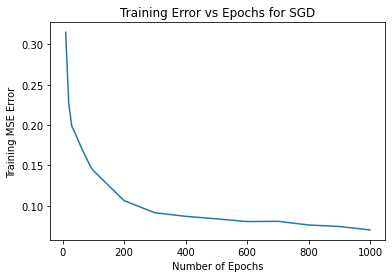

In [ ]:
plt.plot(epoch_list, stochastic_training_errors)
plt.xlabel("Number of Epochs")
plt.ylabel("Training MSE Error")
plt.title("Training Error vs Epochs for SGD")
plt.show()

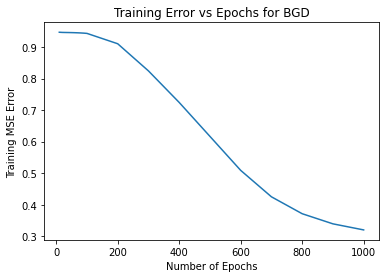

In [ ]:
plt.plot(epoch_list, batch_training_errors)
plt.xlabel("Number of Epochs")
plt.ylabel("Training MSE Error")
plt.title("Training Error vs Epochs for BGD")
plt.show()

In [ ]:
print(stochastic_testing_errors)
print("**********************************************************************************************************")
print(batch_testing_errors)

[0.2898467304712106, 0.1919778849843938, 0.16758794450220185, 0.16348218779586837, 0.15674009313433446, 0.1532107289844106, 0.15018123108314052, 0.14593370773691777, 0.1406582894479648, 0.1366159932046912, 0.1093876948159676, 0.08687331447619881, 0.0833888905124459, 0.08361567950697492, 0.08691416785322958, 0.09358341881432627, 0.09791453034643798, 0.09588563989952571, 0.09482826898284706]
**********************************************************************************************************
[1.2122384601285048, 1.2123910328636074, 1.2124290222377692, 1.212307933980771, 1.212079170348394, 1.2117547552123382, 1.211320356652363, 1.2107458242630345, 1.2099882730834857, 1.2089917424002106, 1.1650127271345134, 1.0392109880070994, 0.88314862346837, 0.720240837052491, 0.5638605860448045, 0.43939226682632454, 0.35649575606090506, 0.3046421851031014, 0.27211581841830484]


### Reporting Testing Errors:
- We observe from above the mse testing errors for stochastic and batch gradient descents
- For Stochastic gradient descent testing error for 1000 epochs is 0.094
- for Batch Gradient Descent testing error for 1000 epochs is 0.272
- Initially, for less epochs the test error for stochastic was less, probably because there will be more updates in the stochastic gradient descent
- But as number of epochs increased the test error for batch gradient descent also decreased, not as much as for stochastic, because batch gradient descent though having less updates
- It was observed that if sufficient epochs say 10,000 are used(not shown here as it took time to run) bgd had lesser test error, as they have less variance in the updates hence less affected by outliers
- For above point it can be seen in below graph stochastic test error also starts to increase slightly after certain epochs in contrast to batch test error which has lesser variance in updates

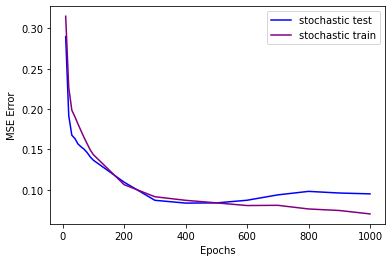

In [ ]:
plt.plot(epoch_list, stochastic_testing_errors, label = 'stochastic test', color = 'blue')
plt.plot(epoch_list, stochastic_training_errors, label = 'stochastic train', color = 'purple')
plt.xlabel("Epochs")
plt.ylabel("MSE Error")
plt.legend()
plt.show()

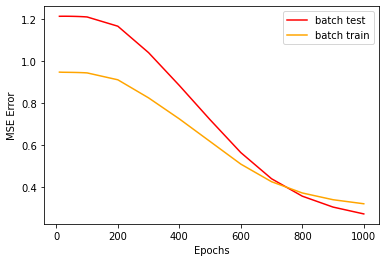

In [ ]:
plt.plot(epoch_list, batch_testing_errors, label = 'batch test', color = 'red')
plt.plot(epoch_list, batch_training_errors, label = 'batch train', color = 'orange')
plt.xlabel("Epochs")
plt.ylabel("MSE Error")
plt.legend()
plt.show()

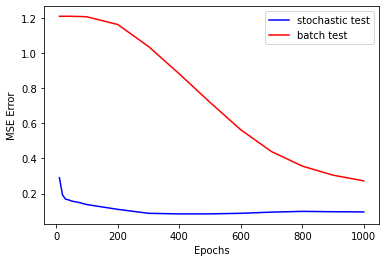

In [ ]:
plt.plot(epoch_list, stochastic_testing_errors, label = 'stochastic test', color = 'blue')
plt.plot(epoch_list, batch_testing_errors, label = 'batch test', color = 'red')
plt.xlabel("Epochs")
plt.ylabel("MSE Error")
plt.legend()
plt.show()

### 1.6) Training MLP with different learning rates with best model
- From above test error plot I observe best model for less than 1000 epochs is:
    - Stochastic
    - Epochs = 400
    - Hidden Layer Activation : sigmoid    

In [ ]:
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.0001]

In [ ]:
train_error_list = []
test_error_list = []

In [ ]:
for rate in learning_rates:
  model = mlp(x_train, y_train, act_hidden=1, batch_size=1, epochs = 400, eta=rate)
  model.batch_gradient_descent()
  train_error_list.append(model.get_error(x_train, y_train))
  test_error_list.append(model.get_error(x_test, y_test))
  print(f'done for learning rate = {rate}')
  print(f'train_error = {train_error_list[-1]}, test_error = {test_error_list[-1]}')

done for learning rate = 0.5
train_error = 1.343140417513896, test_error = 1.6438539078091405
done for learning rate = 0.1
train_error = 0.5617428617389141, test_error = 0.5387448615388033
done for learning rate = 0.01
train_error = 0.08683689441991808, test_error = 0.0833888905124459
done for learning rate = 0.001
train_error = 0.14765798855414275, test_error = 0.10849973353096738
done for learning rate = 0.0001
train_error = 0.28287050353277665, test_error = 0.21551109708550534


In [ ]:
train_error_list_batch = []
test_error_list_batch = []

In [ ]:
for rate in learning_rates:
  model = mlp(x_train, y_train, act_hidden=1, batch_size=len(x_train), epochs = 400, eta=rate)
  model.batch_gradient_descent()
  train_error_list_batch.append(model.get_error(x_train, y_train))
  test_error_list_batch.append(model.get_error(x_test, y_test))
  print(f'done for learning rate = {rate}')
  print(f'train_error = {train_error_list_batch[-1]}, test_error = {test_error_list_batch[-1]}')

done for learning rate = 0.5
train_error = 0.4970226238710586, test_error = 0.4188842691522346
done for learning rate = 0.1
train_error = 0.2501883150935577, test_error = 0.21070014027354028
done for learning rate = 0.01
train_error = 0.7241839506559908, test_error = 0.88314862346837
done for learning rate = 0.001
train_error = 0.9456221163505102, test_error = 1.212292952682727
done for learning rate = 0.0001
train_error = 0.9480173224387772, test_error = 1.2126589069381801


### 1.7)  Error vs Learning Rate

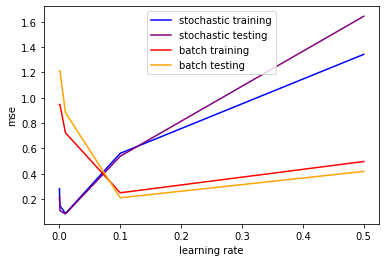

In [ ]:
plt.plot(learning_rates, train_error_list, label = 'stochastic training', color = 'blue')
plt.plot(learning_rates, test_error_list, label = 'stochastic testing', color = 'purple')
plt.plot(learning_rates, train_error_list_batch, label = 'batch training', color = 'red')
plt.plot(learning_rates, test_error_list_batch, label = 'batch testing', color = 'orange')
plt.xlabel('learning rate')
plt.ylabel('mse')
plt.legend()
plt.show()

## It can be seen from above for 400 epochs, for SGD rate = 0.01 is good probably because  already it has many updates, whereas for BGD a higher learning rate would help cancel the affect of lesser updates in comparison to SGD, so learning rate of 0.1 is better for BGD

### Error vs Epochs for each learning rate:

In [ ]:
epochs_list = [10,20,30,40,50,60,70,80,90,100,200,300,400,500] # for simplicity testing on lesser epochs as already done before too

In [ ]:
training_errors_1 = []

In [ ]:
for epoch in epochs_list:
  model1 = mlp(x_train, y_train, act_hidden=1, batch_size = 1,epochs= epoch, eta = 0.5)
  model1.batch_gradient_descent()
  training_errors_1.append(model1.get_error(x_train, y_train))
  print(f'done for epoch = {epoch}')
  print('***********************************************************************')

done for epoch = 10
***********************************************************************
done for epoch = 20
***********************************************************************
done for epoch = 30
***********************************************************************
done for epoch = 40
***********************************************************************
done for epoch = 50
***********************************************************************
done for epoch = 60
***********************************************************************
done for epoch = 70
***********************************************************************
done for epoch = 80
***********************************************************************
done for epoch = 90
***********************************************************************
done for epoch = 100
***********************************************************************
done for epoch = 200
**********************************************************

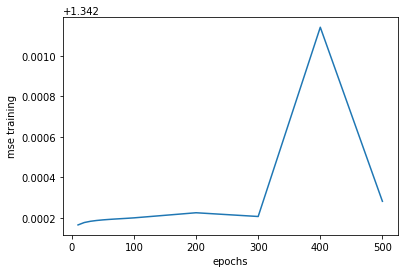

In [ ]:
plt.plot(epochs_list, training_errors_1)
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.show()

done for epoch = 10
***********************************************************************
done for epoch = 20
***********************************************************************
done for epoch = 30
***********************************************************************
done for epoch = 40
***********************************************************************
done for epoch = 50
***********************************************************************
done for epoch = 60
***********************************************************************
done for epoch = 70
***********************************************************************
done for epoch = 80
***********************************************************************
done for epoch = 90
***********************************************************************
done for epoch = 100
***********************************************************************
done for epoch = 200
**********************************************************

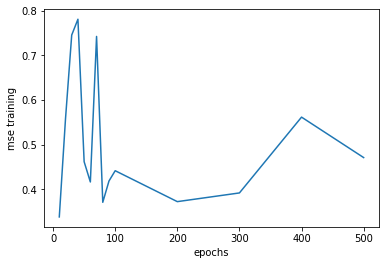

In [ ]:
training_errors_1 = []
for epoch in epochs_list:
  model1 = mlp(x_train, y_train, act_hidden=1, batch_size = 1,epochs= epoch, eta = 0.1)
  model1.batch_gradient_descent()
  training_errors_1.append(model1.get_error(x_train, y_train))
  print(f'done for epoch = {epoch}')
  print('***********************************************************************')
plt.plot(epochs_list, training_errors_1)
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.show()  

done for epoch = 10
***********************************************************************
done for epoch = 20
***********************************************************************
done for epoch = 30
***********************************************************************
done for epoch = 40
***********************************************************************
done for epoch = 50
***********************************************************************
done for epoch = 60
***********************************************************************
done for epoch = 70
***********************************************************************
done for epoch = 80
***********************************************************************
done for epoch = 90
***********************************************************************
done for epoch = 100
***********************************************************************
done for epoch = 200
**********************************************************

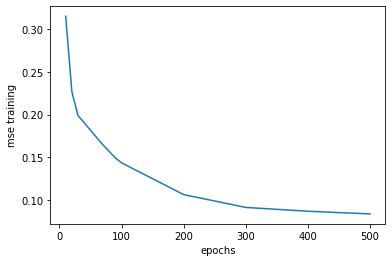

In [ ]:
training_errors_1 = []
for epoch in epochs_list:
  model1 = mlp(x_train, y_train, act_hidden=1, batch_size = 1,epochs= epoch, eta = 0.01)
  model1.batch_gradient_descent()
  training_errors_1.append(model1.get_error(x_train, y_train))
  print(f'done for epoch = {epoch}')
  print('***********************************************************************')
plt.plot(epochs_list, training_errors_1)
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.show()  

done for epoch = 10
***********************************************************************
done for epoch = 20
***********************************************************************
done for epoch = 30
***********************************************************************
done for epoch = 40
***********************************************************************
done for epoch = 50
***********************************************************************
done for epoch = 60
***********************************************************************
done for epoch = 70
***********************************************************************
done for epoch = 80
***********************************************************************
done for epoch = 90
***********************************************************************
done for epoch = 100
***********************************************************************
done for epoch = 200
**********************************************************

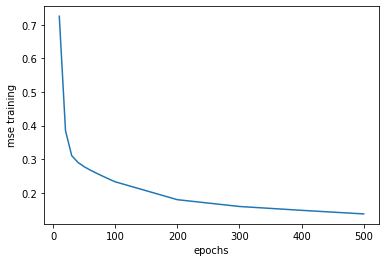

In [ ]:
training_errors_1 = []
for epoch in epochs_list:
  model1 = mlp(x_train, y_train, act_hidden=1, batch_size = 1,epochs= epoch, eta = 0.001)
  model1.batch_gradient_descent()
  training_errors_1.append(model1.get_error(x_train, y_train))
  print(f'done for epoch = {epoch}')
  print('***********************************************************************')
plt.plot(epochs_list, training_errors_1)
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.show()  

done for epoch = 10
***********************************************************************
done for epoch = 20
***********************************************************************
done for epoch = 30
***********************************************************************
done for epoch = 40
***********************************************************************
done for epoch = 50
***********************************************************************
done for epoch = 60
***********************************************************************
done for epoch = 70
***********************************************************************
done for epoch = 80
***********************************************************************
done for epoch = 90
***********************************************************************
done for epoch = 100
***********************************************************************
done for epoch = 200
**********************************************************

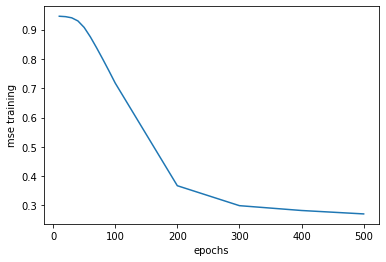

In [ ]:
training_errors_1 = []
for epoch in epochs_list:
  model1 = mlp(x_train, y_train, act_hidden=1, batch_size = 1,epochs= epoch, eta = 0.0001)
  model1.batch_gradient_descent()
  training_errors_1.append(model1.get_error(x_train, y_train))
  print(f'done for epoch = {epoch}')
  print('***********************************************************************')
plt.plot(epochs_list, training_errors_1)
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.show()  


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

5. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

6. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

7. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [1]:
# import Fashion MNIST dataset
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist

In [2]:
fashion_data = fashion_mnist.load_data() #load dataset

4431872/4422102 [==============================] - 0s 0us/step


### 2.1) Dataset Exploration

In [3]:
# From Fashion Mnist documentation on keras website, I get dataset is of below format:
(x_train, y_train), (x_test, y_test) = fashion_data

In [4]:
print(f'''
The training data has {len(x_train)} points
and 
the testing data has {len(x_test)} points''')


The training data has 60000 points
and 
the testing data has 10000 points


In [5]:
# From the tensorflow keras website I get this information regarding classes
class_dict = {0:"T-shirt/top", 
              1:"Trouser",
              2:"Pullover",
              3:"Dress",
              4:"Coat",
              5:"Sandal",
              6:"Shirt",
              7:"Sneaker",
              8:"Bag",
              9:"Ankle boot"
             }

Image of T-shirt/top: 


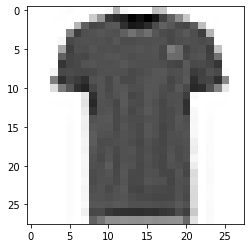

*************************************************************
Image of Trouser: 


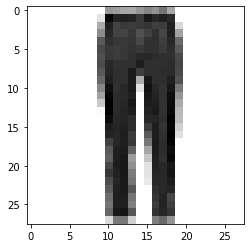

*************************************************************
Image of Pullover: 


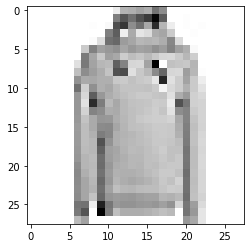

*************************************************************
Image of Dress: 


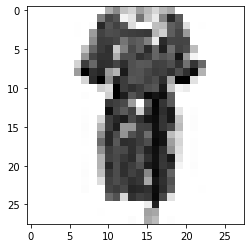

*************************************************************
Image of Coat: 


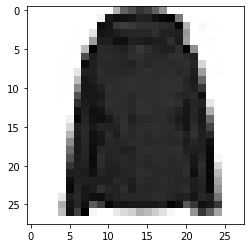

*************************************************************
Image of Sandal: 


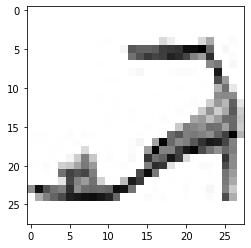

*************************************************************
Image of Shirt: 


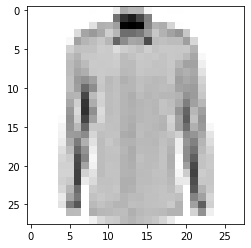

*************************************************************
Image of Sneaker: 


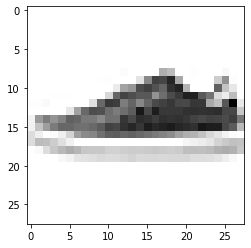

*************************************************************
Image of Bag: 


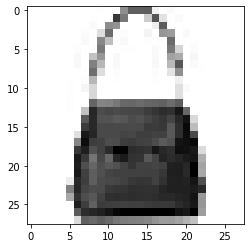

*************************************************************
Image of Ankle boot: 


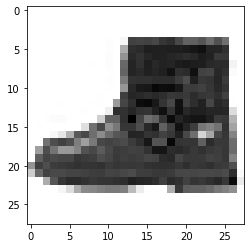

*************************************************************


In [6]:
# Displaying an image from each class
np.random.seed(0)
item_index = []
for key, value in class_dict.items():
  ind = np.random.randint(0, 60000)
  while(y_train[ind]!=key):
    ind = np.random.randint(0, 60000)
  print(f'Image of {value}: ')
  image = x_train[ind]
  item_index.append(ind)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.show()
  print("*************************************************************")

### 2.2) Plotting Distribution of Different Classes

In [7]:
frequency = pd.Series(y_train).value_counts()
frequency

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

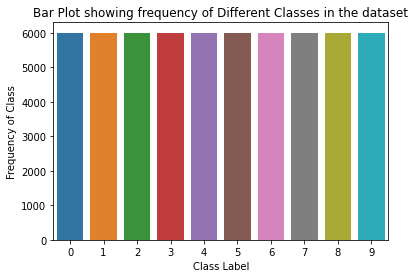

In [8]:
sns.barplot(x = list(frequency.index), y = frequency.values)
plt.xlabel("Class Label")
plt.ylabel("Frequency of Class")
plt.title("Bar Plot showing frequency of Different Classes in the dataset")
plt.show()

### 2.3) Sobel Kernel Implementation

In [9]:
# Declaring Sobel kernels for each dimension
k_x = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])
k_y = np.array([
  [1, 2, 1],
  [0, 0, 0],
  [-1, -2, -1]
])

In [10]:
# The function that convolves the sobel kernel with the input images
# The input images are padded with zeros to ensure output images have same size
def convolve(img):
  m, n = img.shape
  padded_img = np.zeros((m + 2, n + 2))
  padded_img[1:29, 1:29] = img
  g_x = np.zeros((m, n))
  g_y = np.zeros((m, n))
  g_net = np.zeros((m, n))
  for i in range(28):
    for j in range(28):
      g_x[i, j] = np.sum(k_x * padded_img[i:i+3, j:j+3])
      g_y[i, j] = np.sum(k_y * padded_img[i:i+3, j:j+3])
      g_net[i, j] = np.sqrt(g_x[i, j]**2 + g_y[i, j]**2)    
  return (g_net)

In [11]:
def display_img(img, label = -1):
  if label != -1:
    print(f"Image of {class_dict[label]}")  
  plt.imshow(img, cmap = plt.cm.binary)

In [12]:
def display_with_filtered(img, label):
  print(f'Image of {class_dict[label]}')
  plt.subplot(1, 2, 1)
  plt.imshow(img, cmap = plt.cm.binary)
  plt.subplot(1, 2, 2)
  plt.imshow(convolve(img), cmap = plt.cm.binary)
  plt.show()

Image of T-shirt/top


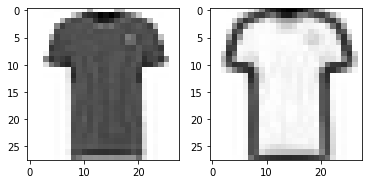

Image of Trouser


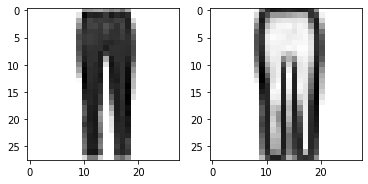

Image of Pullover


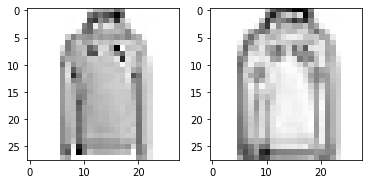

Image of Dress


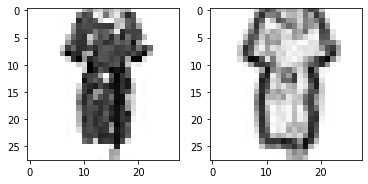

Image of Coat


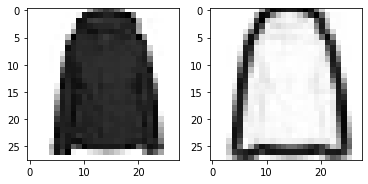

Image of Sandal


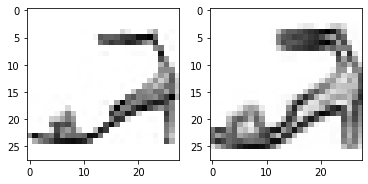

Image of Shirt


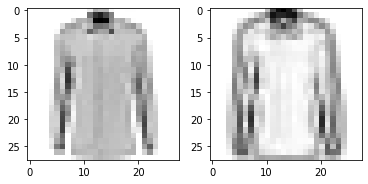

Image of Sneaker


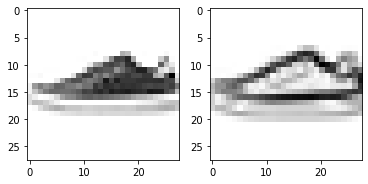

Image of Bag


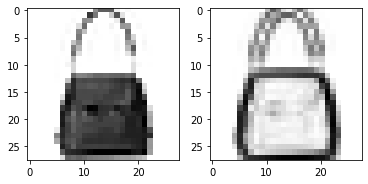

Image of Ankle boot


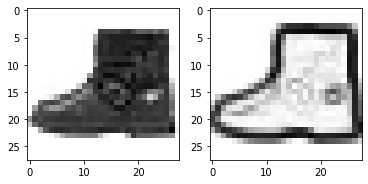

In [13]:
for i in range(len(item_index)):
  display_with_filtered(x_train[item_index[i]], y_train[item_index[i]])

We can see above sobel kernel has resulted only in higlighting of boundaries of images

### 2.4) Implementing CNN Model for Classification using Keras

In [14]:
import tensorflow as tf

*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

In [15]:
keras.backend.clear_session()

In [16]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
  keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
  keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
  keras.layers.Flatten(name = 'L6'),
  keras.layers.Dropout(0.1, name = 'L7'),
  keras.layers.Dense(10, activation = "softmax", name = 'L8')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L2 (Conv2D)                 (None, 28, 28, 32)        320       
                                                                 
 L3 (MaxPooling2D)           (None, 14, 14, 32)        0         
                                                                 
 L4 (Conv2D)                 (None, 14, 14, 64)        18496     
                                                                 
 L5 (MaxPooling2D)           (None, 7, 7, 64)          0         
                                                                 
 L6 (Flatten)                (None, 3136)              0         
                                                                 
 L7 (Dropout)                (None, 3136)              0         
                                                                 
 L8 (Dense)                  (None, 10)                3

### 2.5) Custom Cross Entropy Loss Function

In [18]:
def custom_cross_entropy(y_true, y_pred):
  loss = -1 * (y_true * tf.math.log(y_pred))
  loss = tf.reduce_sum(loss, axis = 1)
  return loss

In [19]:
x_train_new = x_train/255.0 #normalizing image pixel values
x_train_new = x_train_new.reshape(-1, 28, 28, 1) # reshaping as it's requirement of keras sequential model
x_train_new = tf.convert_to_tensor(x_train_new, dtype = tf.float32)
y_train_new = pd.get_dummies(y_train) # one hot encoding the output values
y_train_new = tf.convert_to_tensor(y_train_new, dtype=tf.float32)

x_test_new = x_test/255.0
x_test_new = x_test_new.reshape(-1, 28, 28, 1)
x_test_new = tf.convert_to_tensor(x_test_new, dtype = tf.float32)
y_test_new = pd.get_dummies(y_test)
y_test_new = tf.convert_to_tensor(y_test_new, dtype = tf.float32)

In [20]:
model.compile(loss = custom_cross_entropy, metrics = ['accuracy'])
EPOCHS = 5
history = model.fit(x_train_new, y_train_new, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 22s 6ms/step - loss: 0.4351 - accuracy: 0.8435
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3032 - accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2701 - accuracy: 0.9047
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2501 - accuracy: 0.9120
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2365 - accuracy: 0.9169


In [21]:
loss, accuracy = model.evaluate(x = x_test_new, y = y_test_new, batch_size=len(x_test_new))

1/1 [==============================] - 2s 2s/step - loss: 0.2636 - accuracy: 0.9043


### 2.6) Using Different Optimizers

In [22]:
keras.backend.clear_session()

In [23]:
# SGD 
model1 = keras.Sequential([
  keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
  keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
  keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
  keras.layers.Flatten(name = 'L6'),
  keras.layers.Dropout(0.1, name = 'L7'),
  keras.layers.Dense(10, activation = "softmax", name = 'L8')
])

In [24]:
model1.compile(loss = custom_cross_entropy, metrics=['accuracy'], optimizer = 'SGD')
history1 = model1.fit(x_train_new, y_train_new, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8365 - accuracy: 0.7041
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5066 - accuracy: 0.8187
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4349 - accuracy: 0.8457
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4017 - accuracy: 0.8585
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3782 - accuracy: 0.8665


In [25]:
keras.backend.clear_session()

In [26]:
# rmsprop
model2 = keras.Sequential([
  keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
  keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
  keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
  keras.layers.Flatten(name = 'L6'),
  keras.layers.Dropout(0.1, name = 'L7'),
  keras.layers.Dense(10, activation = "softmax", name = 'L8')
])

In [27]:
model2.compile(loss = custom_cross_entropy, metrics=['accuracy'], optimizer = 'rmsprop')
history2 = model2.fit(x_train_new, y_train_new, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4300 - accuracy: 0.8464
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2982 - accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2643 - accuracy: 0.9068
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2455 - accuracy: 0.9135
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2326 - accuracy: 0.9186


In [28]:
keras.backend.clear_session()

In [29]:
# adam
model3 = keras.Sequential([
  keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
  keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
  keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
  keras.layers.Flatten(name = 'L6'),
  keras.layers.Dropout(0.1, name = 'L7'),
  keras.layers.Dense(10, activation = "softmax", name = 'L8')
])

In [30]:
model3.compile(loss = custom_cross_entropy, metrics = ['accuracy'], optimizer = 'adam')
history3 = model3.fit(x_train_new, y_train_new, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4399 - accuracy: 0.8421
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2949 - accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2568 - accuracy: 0.9077
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2294 - accuracy: 0.9165
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2110 - accuracy: 0.9248


In [31]:
keras.backend.clear_session()

In [32]:
# adagrad
model4 = keras.Sequential([
  keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
  keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
  keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
  keras.layers.Flatten(name = 'L6'),
  keras.layers.Dropout(0.1, name = 'L7'),
  keras.layers.Dense(10, activation = "softmax", name = 'L8')
])

In [33]:
model4.compile(loss = custom_cross_entropy, metrics = ['accuracy'], optimizer = 'adagrad')
history4 = model4.fit(x_train_new, y_train_new, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2675 - accuracy: 0.5820
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7489 - accuracy: 0.7333
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6675 - accuracy: 0.7637
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6226 - accuracy: 0.7774
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5930 - accuracy: 0.7871


In [34]:
epochs = [1, 2, 3, 4, 5]

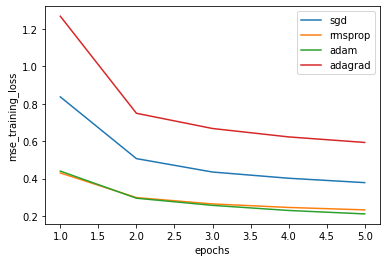

In [43]:
plt.plot(epochs, history1.history['loss'], label = 'sgd')
plt.plot(epochs, history2.history['loss'], label = 'rmsprop')
plt.plot(epochs, history3.history['loss'], label = 'adam')
plt.plot(epochs, history4.history['loss'], label = 'adagrad')
plt.xlabel('epochs')
plt.ylabel('mse_training_loss')
plt.legend()
plt.show()

### It is seen adam optimizer is performing best, then rms prop, then sgd and last adagrad

## 1.7) Varying Drop Out Rates

In [44]:
drop_rates = [0.01,0.1, 0.2, 0.3, 0.4]

In [50]:
train_acc = []
train_loss = []
test_acc = []
test_loss = []

In [51]:
for rate in drop_rates:
    keras.backend.clear_session()
    model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (28, 28,1), name = 'L1'),
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L2'),
    keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L3'),
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = "same", strides = 1, name = 'L4'),
    keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = 'L5'),
    keras.layers.Flatten(name = 'L6'),
    keras.layers.Dropout(rate, name = 'L7'),
    keras.layers.Dense(10, activation = "softmax", name = 'L8')
    ])
    model.compile(loss = custom_cross_entropy, metrics = ['accuracy'])
    EPOCHS = 5
    history = model.fit(x_train_new, y_train_new, epochs=EPOCHS)
    train_acc.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    loss, accuracy = model.evaluate(x = x_test_new, y = y_test_new, batch_size=len(x_test_new))
    test_loss.append(loss)
    test_acc.append(accuracy)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4280 - accuracy: 0.8477
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2946 - accuracy: 0.8966
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2569 - accuracy: 0.9088
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2364 - accuracy: 0.9169
Epoch 5/5
1/1 [==============================] - 0s 293ms/step - loss: 0.2635 - accuracy: 0.9100
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4309 - accuracy: 0.8457
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2952 - accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2604 - accuracy: 0.9073
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2405 - accuracy: 0.9157
Epoch 5/5
1/1 [==============================] - 0s 294ms/step - loss: 0.2614 - accurac

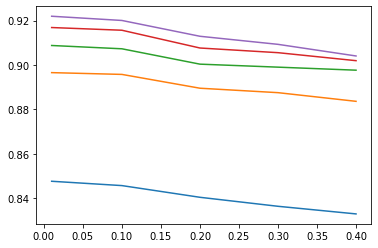

In [52]:
plt.plot(drop_rates, train_acc)

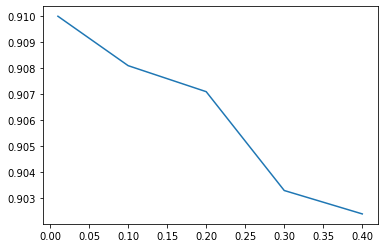

In [53]:
plt.plot(drop_rates, test_acc)

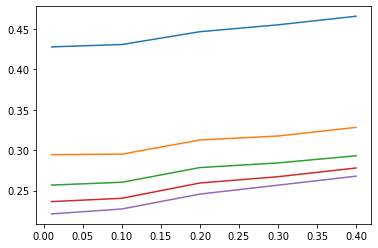

In [54]:
plt.plot(drop_rates, train_loss)

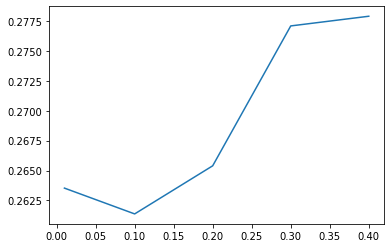

In [55]:
plt.plot(drop_rates, test_loss)

In [56]:
## It can be observed with frop rate increasing train and test accuracy decresing, so too high drop rate is not good as well